In [1]:
import pandas as pd
import numpy as np
import FILibExcel
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
excel_path = r"./mock/AntiBio1.xlsx"

In [3]:
tables_dict = FILibExcel.get_all_tables(file_name=excel_path)
df_compounds = tables_dict["TLantTest"]['dataframe']
df_bacterias = tables_dict["Table4"]['dataframe']
df_experiments = tables_dict["Table5"]['dataframe']


worksheet name: Table
tables in worksheet: 0

worksheet name: CompoundsData
tables in worksheet: 1
table name: TLantTest

worksheet name: BacteriasData
tables in worksheet: 1
table name: Table4

worksheet name: ExperimentsData
tables in worksheet: 1
table name: Table5

worksheet name: Legend-Main
tables in worksheet: 1
table name: T_Legend_main

worksheet name: Bac
tables in worksheet: 1
table name: T_Bacteria


In [4]:
df_experiments.head()

,REE,Bacteria,Is salt,Stunting diameter
0,La,Staphylococcus aureus,0,25
1,Ce,Staphylococcus aureus,0,23
2,Pr,Staphylococcus aureus,0,22
3,Sm,Staphylococcus aureus,0,20
4,Eu,Staphylococcus aureus,0,22


In [5]:
df_compounds.head()

,REE,Ionic radii,Electronegativity,Crystal structure type,Coordination number salt,Coordination number solution,рН,lgβ,Electronic structure RE3+,Price
0,La,1.03,2.49,1,11,11,4.44,0.8,600.430.520,138000
1,Ce,1.01,2.61,1,11,11,4.20,0.9,601.43,32790
2,Pr,0.99,2.24,2,10,10,4.51,0.9,602.43,98500
3,Sm,0.96,1.90,2,10,10,5.08,0.9,602.433,97000
4,Eu,0.95,1.81,2,10,10,5.56,0.8,602.434,134500


In [6]:
df_bacterias.head()

,Name,Gram-stain,Wall thickness min,Wall thickness max,Wall structure,Wall composition 1,Wall composition 2,Outer membrane,Membrane pore diameter min,Membrane pore diameter max,Proteins,Penicillin sensitivity,Well layers
0,Staphylococcus aureus,1,20,60,1,1,2,0,1,6,1,2,2
1,Escherichia coli,-1,14,18,2,0,1,1,1,15,2,1,1
2,Pseudomonas aeruginosa,-1,14,18,2,0,1,1,1,15,2,1,1
3,Klebsiella pneumoniae,-1,14,18,2,0,1,1,1,15,2,1,1


Let's drop names of compounds and bacteria. Also, we will drop price information because it doesn't affect the target variable. For now, we will drop electronic structure and lgβ because we should make some efforts to interpret them for the model. Membrane pore diameter min is also not interesting for us because it has the same value for all bacteria

In [7]:
df = df_experiments.merge(df_compounds, left_on='REE', right_on='REE').merge(df_bacterias, left_on='Bacteria', right_on='Name')
df = df.drop(['REE', 'Bacteria', 'Membrane pore diameter min', 'Price', 'Name', 'Electronic structure RE3+', 'lgβ'], axis=1)
df.head()

,Is salt,Stunting diameter,Ionic radii,Electronegativity,Crystal structure type,Coordination number salt,Coordination number solution,рН,Gram-stain,Wall thickness min,Wall thickness max,Wall structure,Wall composition 1,Wall composition 2,Outer membrane,Membrane pore diameter max,Proteins,Penicillin sensitivity,Well layers
0,0,25,1.03,2.49,1,11,11,4.44,1,20,60,1,1,2,0,6,1,2,2
1,1,38,1.03,2.49,1,11,11,4.44,1,20,60,1,1,2,0,6,1,2,2
2,0,23,1.01,2.61,1,11,11,4.20,1,20,60,1,1,2,0,6,1,2,2
3,1,40,1.01,2.61,1,11,11,4.20,1,20,60,1,1,2,0,6,1,2,2
4,0,22,0.99,2.24,2,10,10,4.51,1,20,60,1,1,2,0,6,1,2,2


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Is salt,99.0,0.515152,0.502314,0.00,0.000,1.00,1.00,1.00
Stunting diameter,99.0,29.505051,10.562133,0.00,21.000,27.00,40.00,50.00
Ionic radii,99.0,0.924949,0.068383,0.75,0.885,0.92,0.99,1.03
Electronegativity,99.0,2.226263,0.277292,1.78,2.020,2.24,2.49,2.68
Crystal structure type,99.0,3.252525,1.955335,1.00,2.000,2.00,4.50,7.00
Coordination number salt,99.0,9.373737,1.411222,6.00,9.000,10.00,10.00,11.00
Coordination number solution,99.0,9.373737,1.411222,6.00,9.000,10.00,10.00,11.00
рН,99.0,4.814040,1.203583,1.87,4.440,5.16,5.63,5.96
Gram-stain,99.0,-0.373737,0.932255,-1.00,-1.000,-1.00,1.00,1.00
Wall thickness min,99.0,15.878788,2.796765,14.00,14.000,14.00,20.00,20.00


In [9]:
df.dtypes

Is salt                           int64
Stunting diameter                 int64
Ionic radii                     float64
Electronegativity               float64
Crystal structure type            int64
Coordination number salt          int64
Coordination number solution      int64
рН                              float64
Gram-stain                        int64
Wall thickness min                int64
Wall thickness max                int64
Wall structure                    int64
Wall composition 1                int64
Wall composition 2                int64
Outer membrane                    int64
Membrane pore diameter max        int64
Proteins                          int64
Penicillin sensitivity            int64
Well layers                       int64
dtype: object

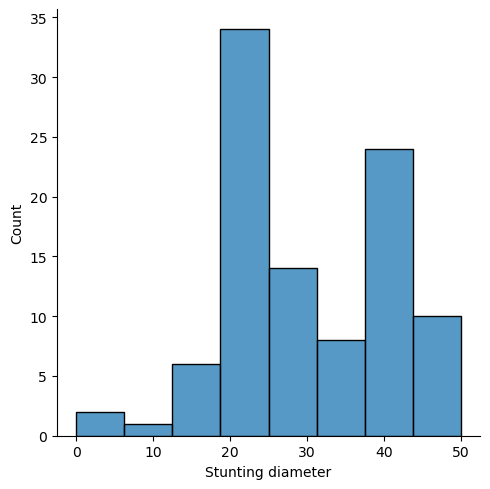

In [10]:
sns.displot(df['Stunting diameter'])

In [11]:
from sklearn.model_selection import train_test_split

X = df.drop('Stunting diameter', axis=1)
y = df['Stunting diameter']


In [12]:
!pip install xgboost

In [13]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb 

In [14]:
def hex_to_RGB(hex_str):
    """ #FFFFFF -> [255,255,255]"""
    #Pass 16 to the integer function for change of base
    return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]

def get_color_gradient(c1, c2, n):
    """
    Given two hex colors, returns a color gradient
    with n colors.
    """
    assert n > 1
    c1_rgb = np.array(hex_to_RGB(c1))/255
    c2_rgb = np.array(hex_to_RGB(c2))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]


In [75]:
def draw_importance(importances, model_name, columns=X.columns):
    features = {}
    color1 = "#2D466D"
    color2 = "#A2B0C5"
    for i, feature in enumerate(columns):
        features[f"f{i+1}"] = feature

    indices = np.argsort(importances)[::-1]
    num_to_plot = len(columns)
    feature_indices = [ind + 1 for ind in indices[:num_to_plot]]

    print("Feature ranking:")
    for f in range(num_to_plot):
        print(
            "%d. %s %f "
            % (f + 1, features["f" + str(feature_indices[f])], importances[indices[f]])
        )
    plt.figure(figsize=(20, 10))
    bars = plt.bar(
        range(num_to_plot),
        importances[indices[:num_to_plot]],
        color=get_color_gradient(color1, color2, num_to_plot),
        align="center",
    )
    ticks = plt.xticks(range(num_to_plot), feature_indices, fontsize=22)
    plt.yticks(fontsize=22)
    plt.xlim([-1, num_to_plot])
    plt.legend(bars, [u"".join(features["f" + str(i)]) for i in feature_indices], fontsize="20");
    plt.title(f"Feature importance in {model_name}")
    plt.savefig(f'mock/{model_name}.eps', format='eps', dpi=600, bbox_inches='tight', transparent="True", pad_inches=0)
    

In [16]:
parameters = {
    'n_estimators': range(100, 1000, 50),
    'max_depth': [None] + list(range(3, 15, 1))}

model = RandomForestRegressor(random_state=42)
clf = GridSearchCV(
    model, 
    parameters, 
    cv=5, 
    scoring='neg_mean_absolute_error',
    refit=True,
    n_jobs=-1)
clf.fit(X, y)
best_random_forest = clf.best_estimator_
print(clf.best_score_)
print(clf.best_params_)

-4.49028242353981
{'max_depth': 3, 'n_estimators': 200}


Feature ranking:
1. Is salt 0.769418 
2. рН 0.071293 
3. Crystal structure type 0.049636 
4. Electronegativity 0.026412 
5. Coordination number salt 0.019614 
6. Coordination number solution 0.015239 
7. Ionic radii  0.013429 
8. Wall composition 2 0.004619 
9. Membrane pore diameter max 0.004585 
10. Wall composition 1 0.003466 
11. Outer membrane 0.003452 
12. Gram-stain 0.003154 
13. Wall thickness max 0.003038 
14. Wall thickness min 0.002791 
15. Proteins 0.002726 
16. Wall structure 0.002581 
17. Well layers 0.002401 
18. Penicillin sensitivity 0.002145 


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


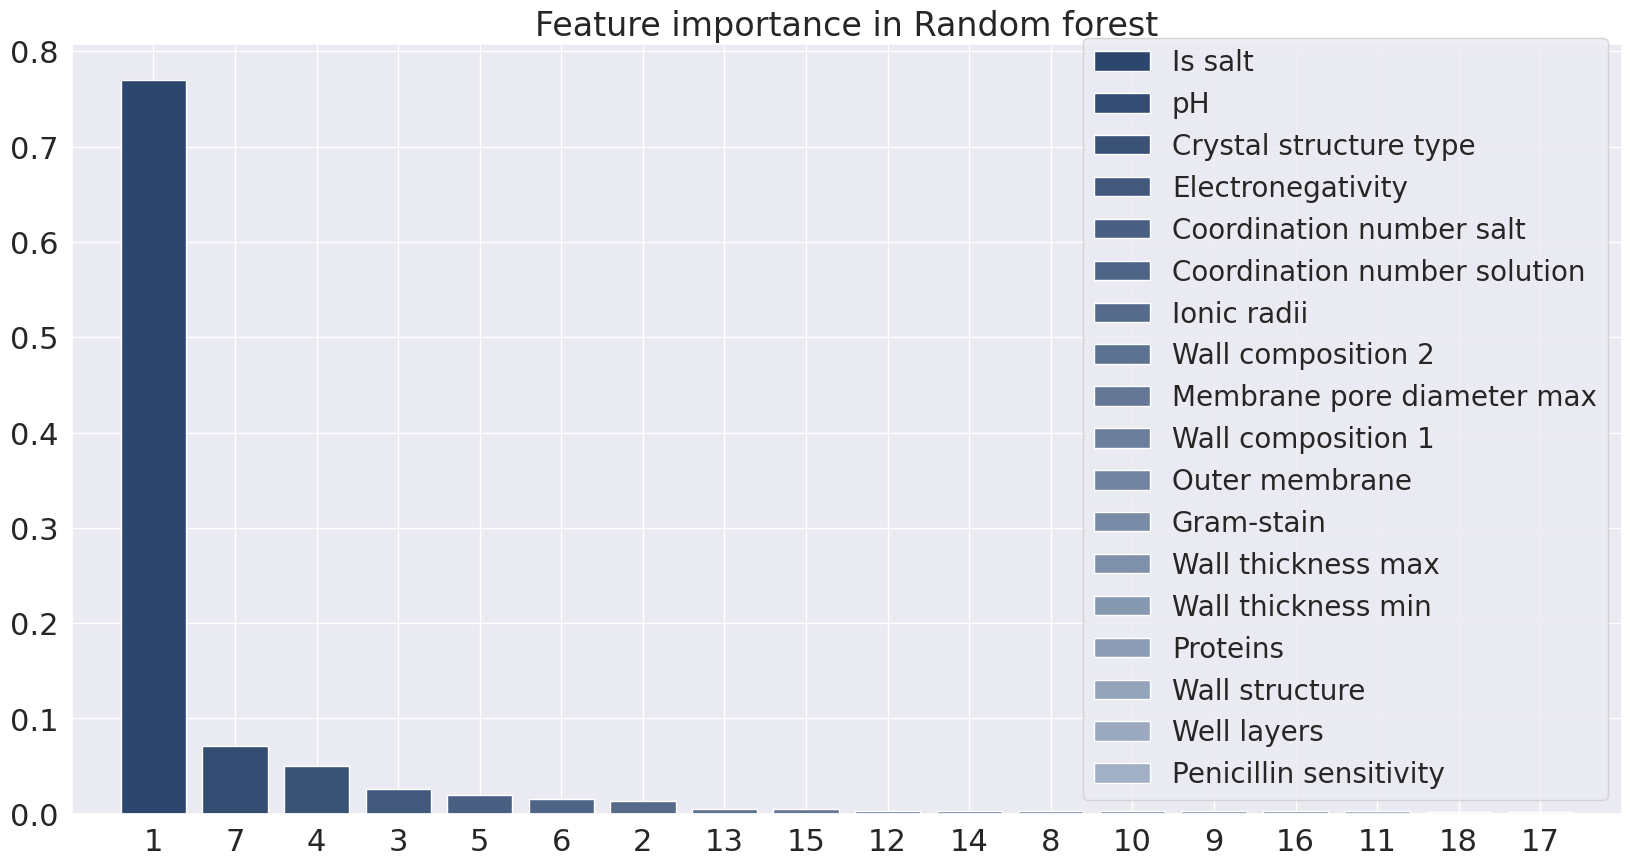

In [76]:
draw_importance(best_random_forest.feature_importances_, "Random forest")

In [18]:
parameters = {
    'learning_rate': [0.5, 0.25, 0.1, 0.05, 0.01],
    'n_estimators': [2, 4, 8, 16, 32, 64, 100, 200, 300, 400],
    'max_depth': range(1, 18, 1)}

model = GradientBoostingRegressor(random_state=42)
clf = GridSearchCV(
    model, 
    parameters, 
    cv=5, 
    scoring='neg_mean_absolute_error',
    refit=True,
    n_jobs=-1)
clf.fit(X, y)
best_gradient_boost = clf.best_estimator_
print(clf.best_score_)
print(clf.best_params_)

-4.5221796208467016
{'learning_rate': 0.5, 'max_depth': 1, 'n_estimators': 8}


Feature ranking:
1. Is salt 0.900402 
2. рН 0.057571 
3. Crystal structure type 0.042027 
4. Penicillin sensitivity 0.000000 
5. Ionic radii  0.000000 
6. Electronegativity 0.000000 
7. Coordination number salt 0.000000 
8. Coordination number solution 0.000000 
9. Gram-stain 0.000000 
10. Well layers 0.000000 
11. Wall thickness max 0.000000 
12. Wall structure 0.000000 
13. Wall composition 1 0.000000 
14. Wall composition 2 0.000000 
15. Outer membrane 0.000000 
16. Membrane pore diameter max 0.000000 
17. Proteins 0.000000 
18. Wall thickness min 0.000000 


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


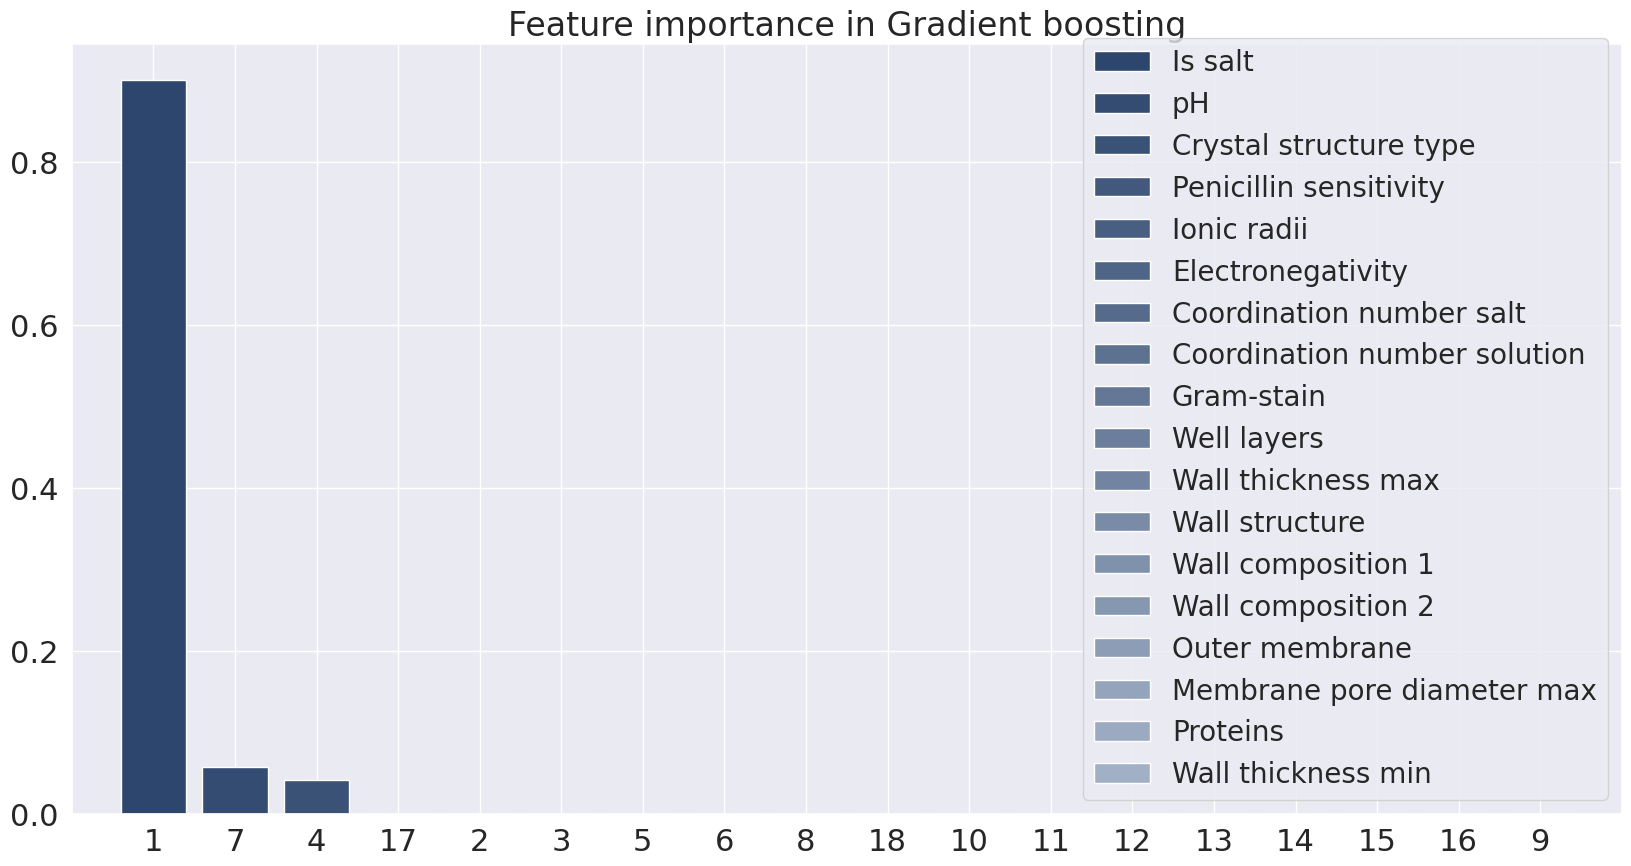

In [77]:
draw_importance(best_gradient_boost.feature_importances_, "Gradient boosting")

In [20]:
parameters = {
    'min_child_weight': [1, 5, 7, 10, 11, 12, 15, 17, 18, 20],
    'gamma': [0.5, 1, 1.5, 2, 2.5, 3, 5],
    'subsample': [0.3, 0.4, 0.5, 0.6, 0.8, 1.0],
    'colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5]
}

model = xgb.XGBRegressor(learning_rate=0.02, n_estimators=600, nthread=1, seed=0)
clf = GridSearchCV(
    model, 
    parameters, 
    cv=5, 
    scoring='neg_mean_absolute_error',
    refit=True,
    n_jobs=-1)
clf.fit(X, y)
best_xgboost = clf.best_estimator_
print(clf.best_score_)
print(clf.best_params_)

-4.420565213655171
{'colsample_bytree': 0.8, 'gamma': 1, 'max_depth': 3, 'min_child_weight': 17, 'subsample': 1.0}


Feature ranking:
1. Is salt 0.747050 
2. Crystal structure type 0.037182 
3. Wall thickness max 0.032247 
4. Electronegativity 0.032013 
5. рН 0.031118 
6. Gram-stain 0.026927 
7. Ionic radii  0.021384 
8. Wall thickness min 0.021005 
9. Coordination number solution 0.017896 
10. Coordination number salt 0.017486 
11. Wall structure 0.015693 
12. Penicillin sensitivity 0.000000 
13. Wall composition 1 0.000000 
14. Wall composition 2 0.000000 
15. Outer membrane 0.000000 
16. Membrane pore diameter max 0.000000 
17. Proteins 0.000000 
18. Well layers 0.000000 


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


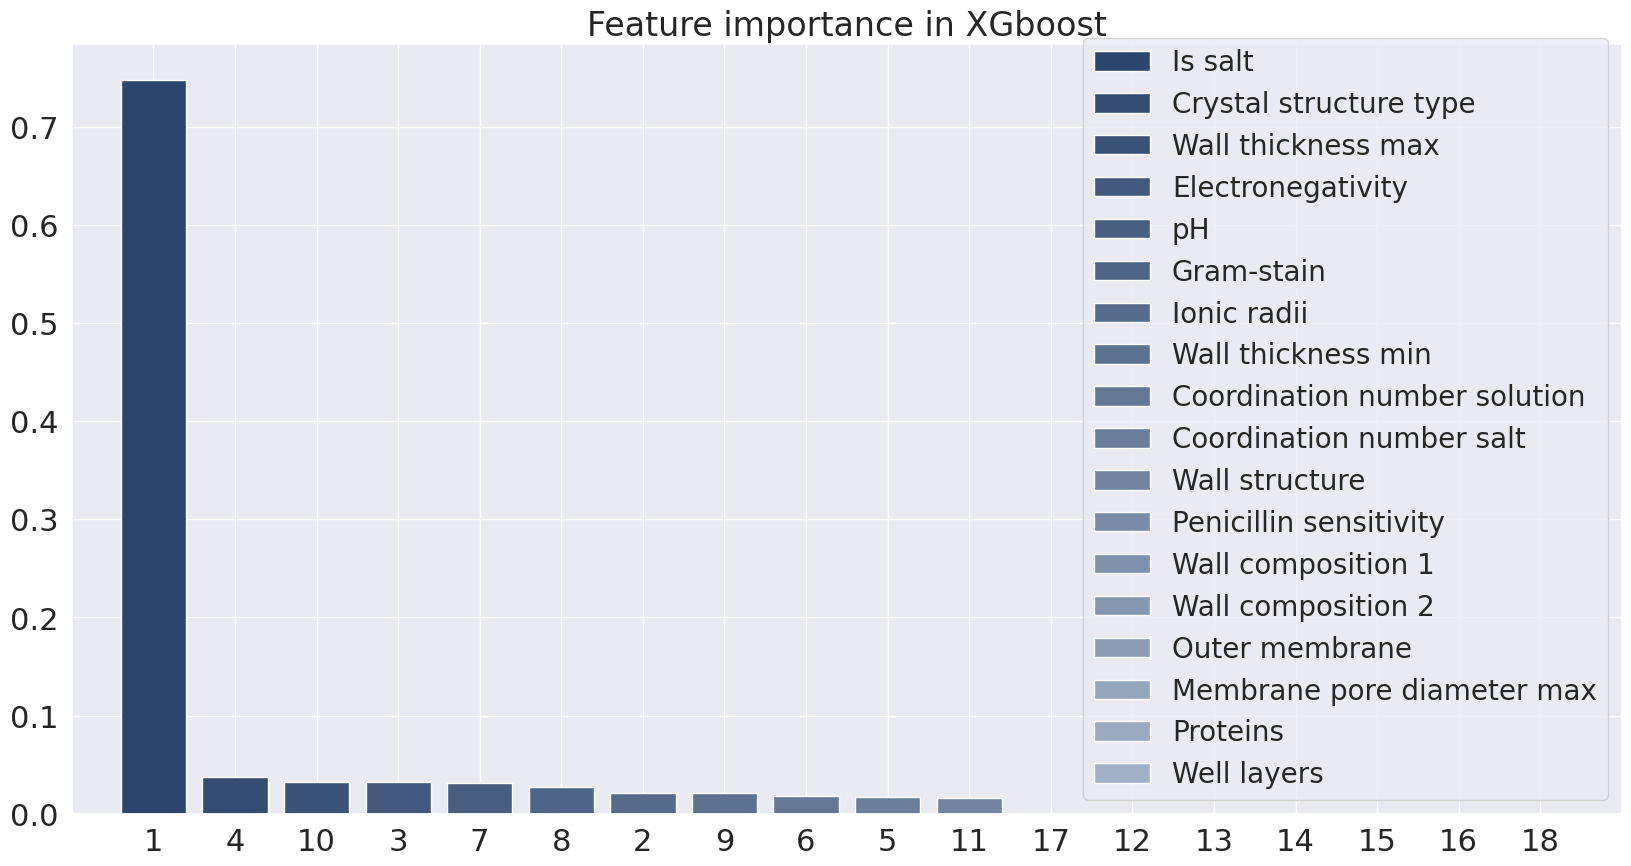

In [78]:
draw_importance(best_xgboost.feature_importances_, "XGboost")

## Сonclusion

We can see, that environment condition where compound take place hardly affect model, so let's split datasets and train to different models for salts and solution.

In [22]:
X_salts = X[X['Is salt'] == 1].drop(['Coordination number solution', 'рН', 'Is salt'], axis=1)
y_salts = y[X['Is salt'] == 1]

X_solution = X[X['Is salt'] == 0].drop(['Coordination number salt', 'Is salt'], axis=1)
y_solution = y[X['Is salt'] == 0]

In [23]:
parameters = {
    'n_estimators': range(50, 1000, 50),
    'max_depth': [None] + list(range(1, 15, 1))}

model = RandomForestRegressor(random_state=42)
clf = GridSearchCV(
    model, 
    parameters, 
    cv=5, 
    scoring='neg_mean_absolute_error',
    refit=True,
    n_jobs=-1)
clf.fit(X_salts, y_salts)
best_random_forest_salts = clf.best_estimator_
print(clf.best_score_)
print(clf.best_params_)

-4.801766717076241
{'max_depth': 4, 'n_estimators': 900}


Feature ranking:
1. Electronegativity 0.247346 
2. Crystal structure type 0.218093 
3. Ionic radii  0.193604 
4. Coordination number salt 0.144595 
5. Wall structure 0.020609 
6. Gram-stain 0.018811 
7. Wall composition 1 0.018646 
8. Wall thickness max 0.018598 
9. Proteins 0.018591 
10. Penicillin sensitivity 0.017908 
11. Membrane pore diameter max 0.017425 
12. Wall composition 2 0.017394 
13. Well layers 0.017266 
14. Outer membrane 0.015710 
15. Wall thickness min 0.015404 


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


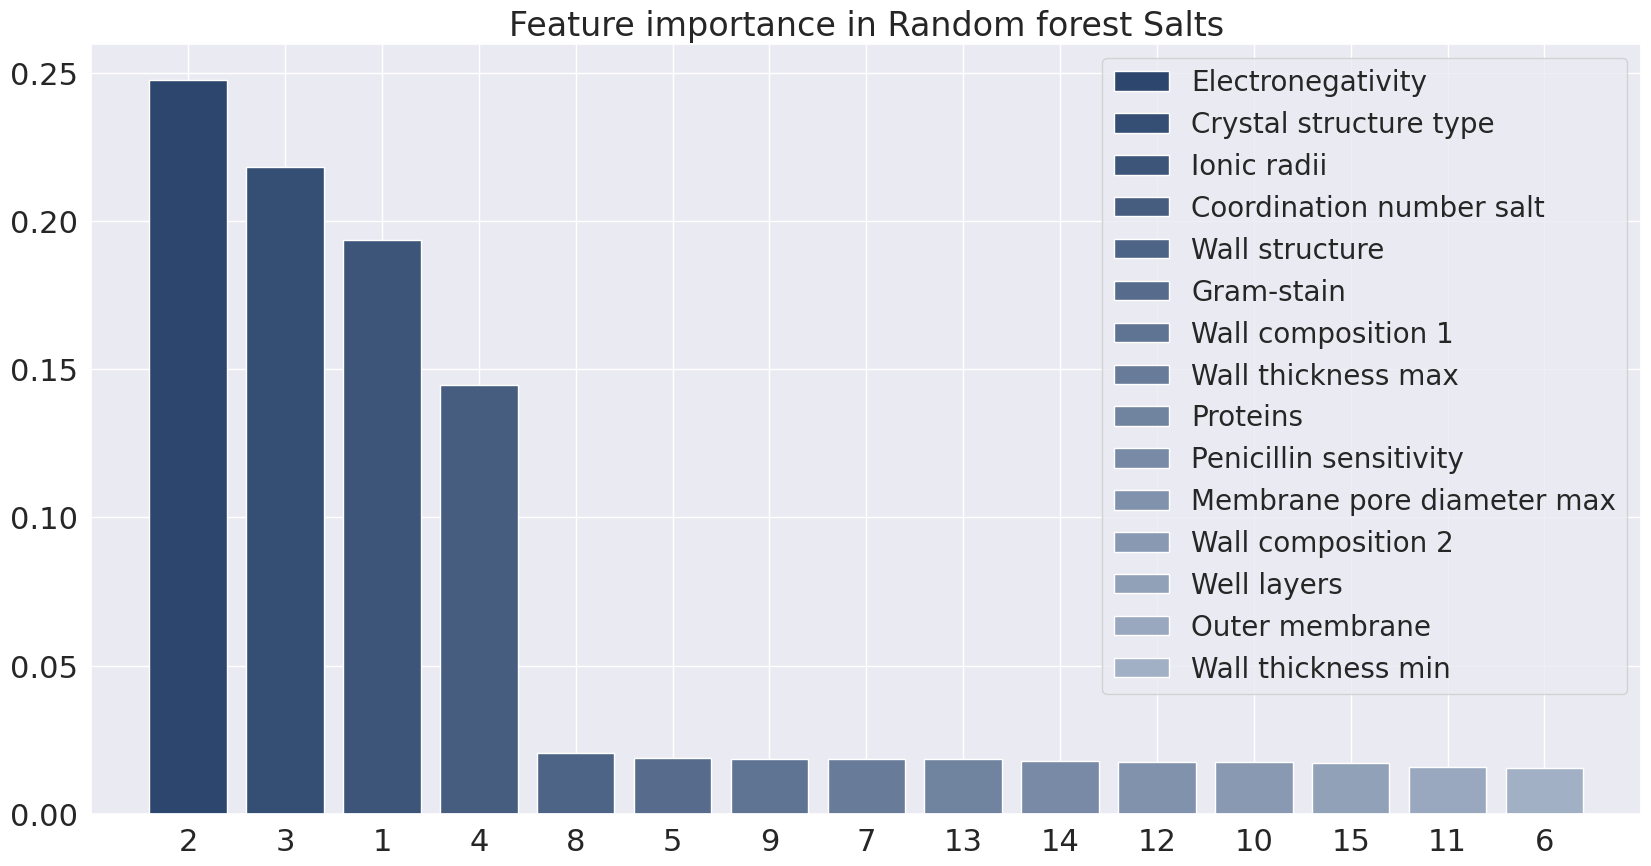

In [79]:
draw_importance(best_random_forest_salts.feature_importances_, "Random forest Salts", X_salts.columns)

In [25]:
parameters = {
    'learning_rate': [0.5, 0.25, 0.1, 0.05, 0.01],
    'n_estimators': [2, 4, 8, 16, 32, 64, 100, 200, 300, 400],
    'max_depth': range(1, 18, 1)}

model = GradientBoostingRegressor(random_state=42)
clf = GridSearchCV(
    model, 
    parameters, 
    cv=5, 
    scoring='neg_mean_absolute_error',
    refit=True,
    n_jobs=-1)
clf.fit(X_salts, y_salts)
best_gradient_boost_salts = clf.best_estimator_
print(clf.best_score_)
print(clf.best_params_)

-4.978720230670563
{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 16}


Feature ranking:
1. Electronegativity 0.401763 
2. Crystal structure type 0.211431 
3. Ionic radii  0.171264 
4. Gram-stain 0.043442 
5. Wall thickness max 0.038085 
6. Wall structure 0.034281 
7. Coordination number salt 0.032353 
8. Wall composition 1 0.021431 
9. Membrane pore diameter max 0.014948 
10. Penicillin sensitivity 0.012178 
11. Wall thickness min 0.009868 
12. Wall composition 2 0.002820 
13. Well layers 0.002554 
14. Proteins 0.001934 
15. Outer membrane 0.001649 


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


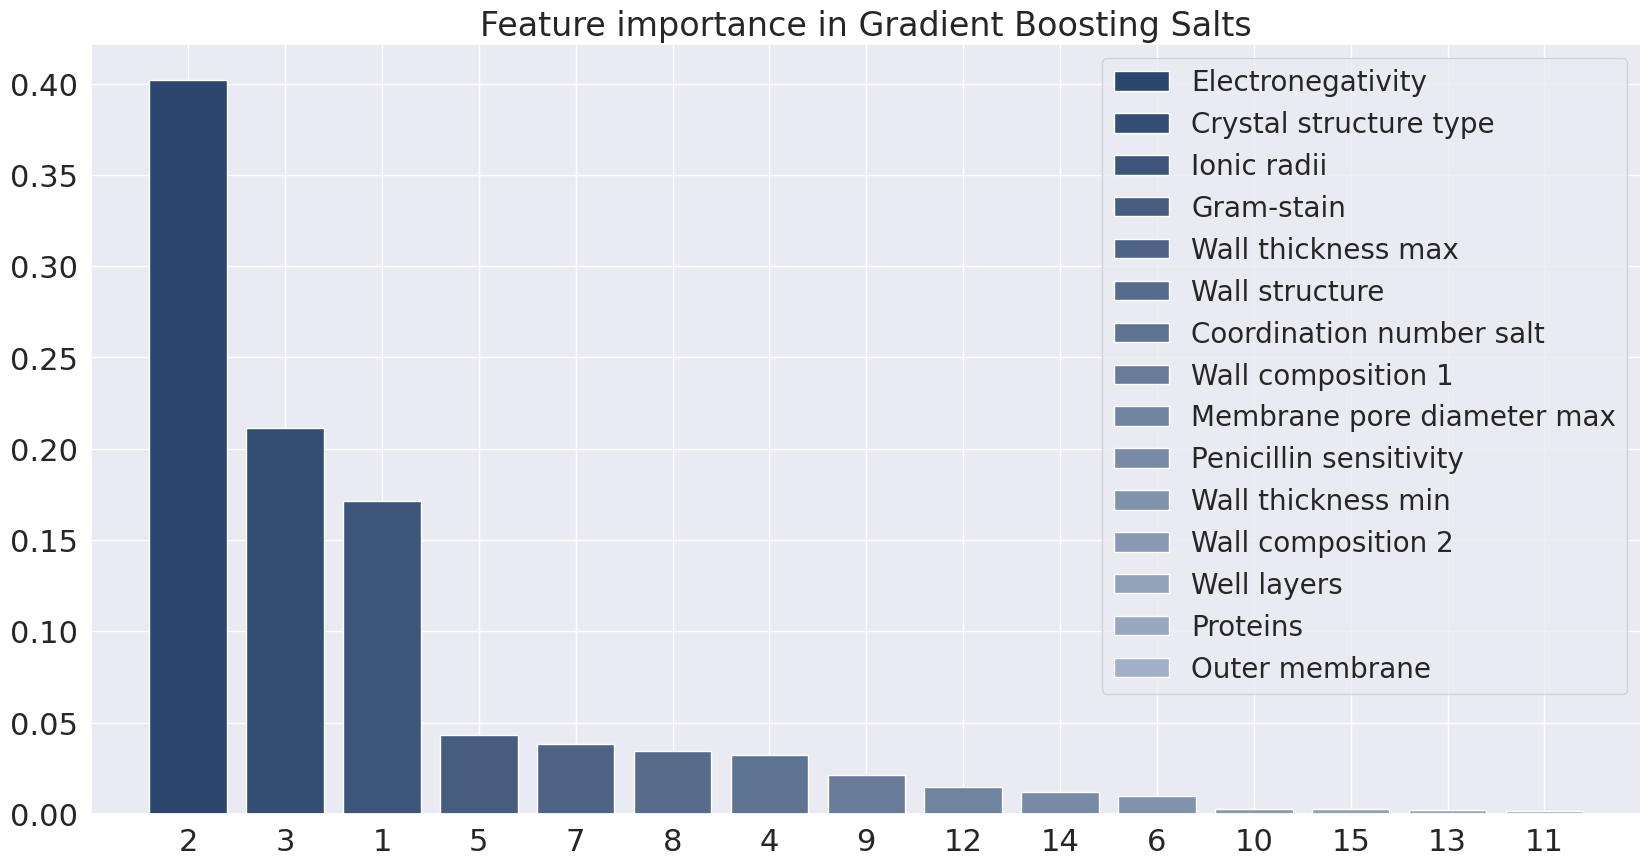

In [80]:
draw_importance(best_gradient_boost_salts.feature_importances_, "Gradient Boosting Salts", X_salts.columns)

In [27]:
parameters = {
    'min_child_weight': [1, 5, 7, 10, 11, 12, 15,],
    'gamma': [0.5, 1, 1.5, 2, 2.5, 3, 5],
    'subsample': [0.4, 0.5, 0.6, 0.8, 1.0],
    'colsample_bytree': [0.4, 0.5, 0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5]
}

model = xgb.XGBRegressor(learning_rate=0.02, n_estimators=600, nthread=1, seed=0)
clf = GridSearchCV(
    model, 
    parameters, 
    cv=5, 
    scoring='neg_mean_absolute_error',
    refit=True,
    n_jobs=-1)
clf.fit(X_salts, y_salts)
best_xgboost_salts = clf.best_estimator_
print(clf.best_score_)
print(clf.best_params_)

-4.9020835876464846
{'colsample_bytree': 1.0, 'gamma': 2.5, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.6}


Feature ranking:
1. Coordination number salt 0.426236 
2. Crystal structure type 0.207525 
3. Gram-stain 0.124056 
4. Ionic radii  0.121948 
5. Electronegativity 0.120234 
6. Well layers 0.000000 
7. Penicillin sensitivity 0.000000 
8. Proteins 0.000000 
9. Membrane pore diameter max 0.000000 
10. Outer membrane 0.000000 
11. Wall composition 2 0.000000 
12. Wall composition 1 0.000000 
13. Wall structure 0.000000 
14. Wall thickness max 0.000000 
15. Wall thickness min 0.000000 


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


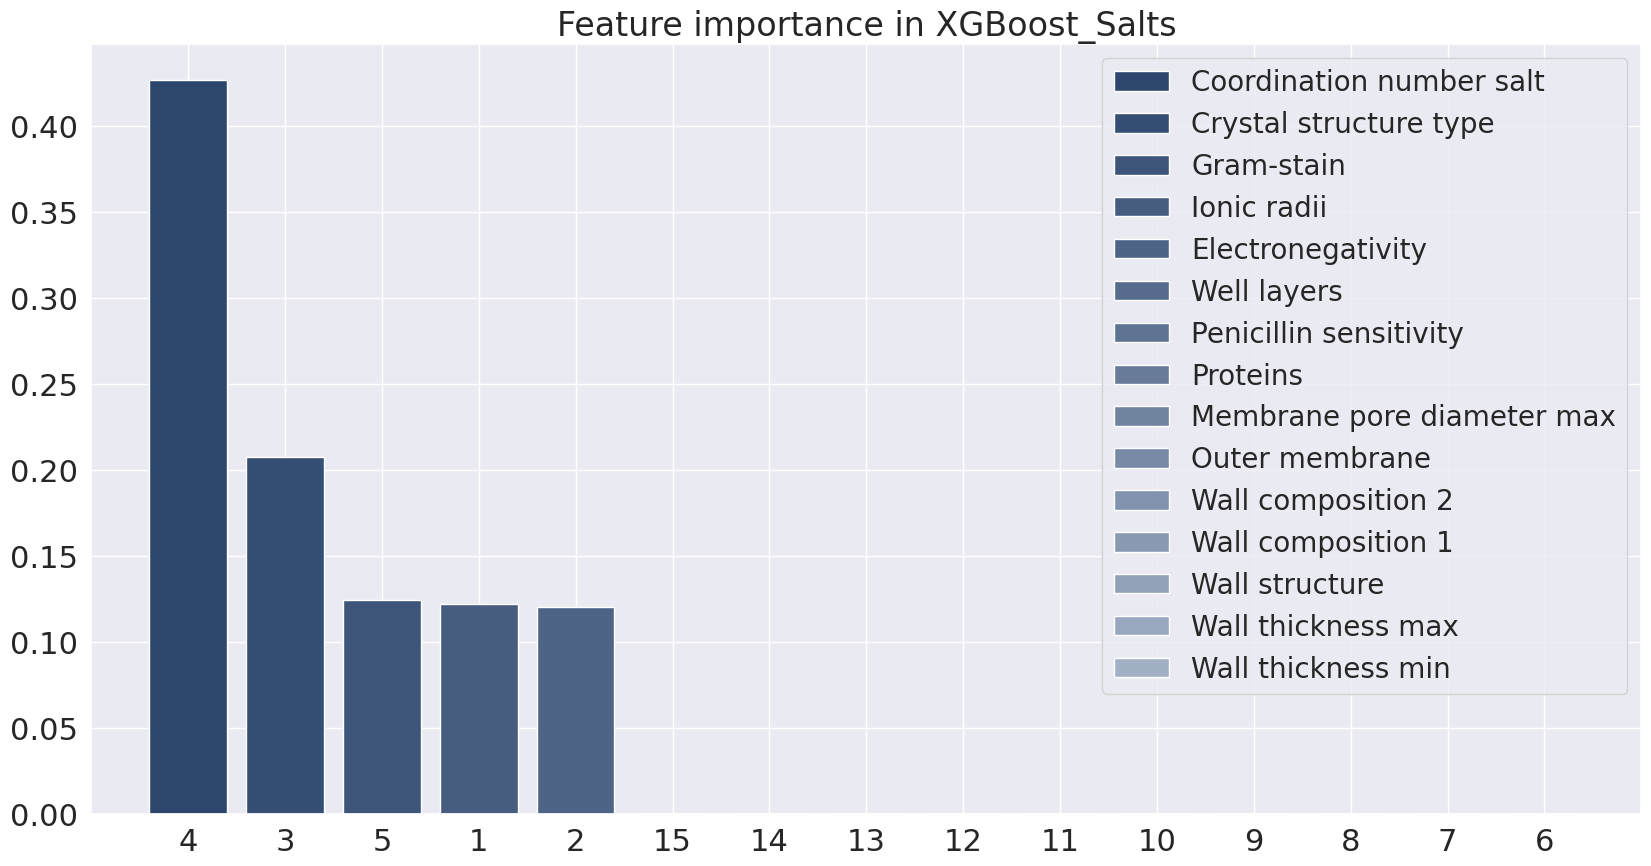

In [81]:
draw_importance(best_xgboost_salts.feature_importances_, "XGBoost_Salts", X_salts.columns)

In [29]:
parameters = {
    'n_estimators': range(50, 1000, 50),
    'max_depth': [None] + list(range(1, 15, 1))}

model = RandomForestRegressor(random_state=42)
clf = GridSearchCV(
    model, 
    parameters, 
    cv=5, 
    scoring='neg_mean_absolute_error',
    refit=True,
    n_jobs=-1)
clf.fit(X_solution, y_solution)
best_random_forest_solution = clf.best_estimator_
print(clf.best_score_)
print(clf.best_params_)

-3.888800358980889
{'max_depth': 1, 'n_estimators': 900}


Feature ranking:
1. Crystal structure type 0.404444 
2. Coordination number solution 0.221111 
3. Electronegativity 0.151111 
4. рН 0.085556 
5. Ionic radii  0.082222 
6. Penicillin sensitivity 0.011111 
7. Membrane pore diameter max 0.010000 
8. Proteins 0.006667 
9. Wall thickness max 0.005556 
10. Wall thickness min 0.005556 
11. Well layers 0.004444 
12. Wall composition 1 0.004444 
13. Outer membrane 0.002222 
14. Wall composition 2 0.002222 
15. Gram-stain 0.002222 
16. Wall structure 0.001111 


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


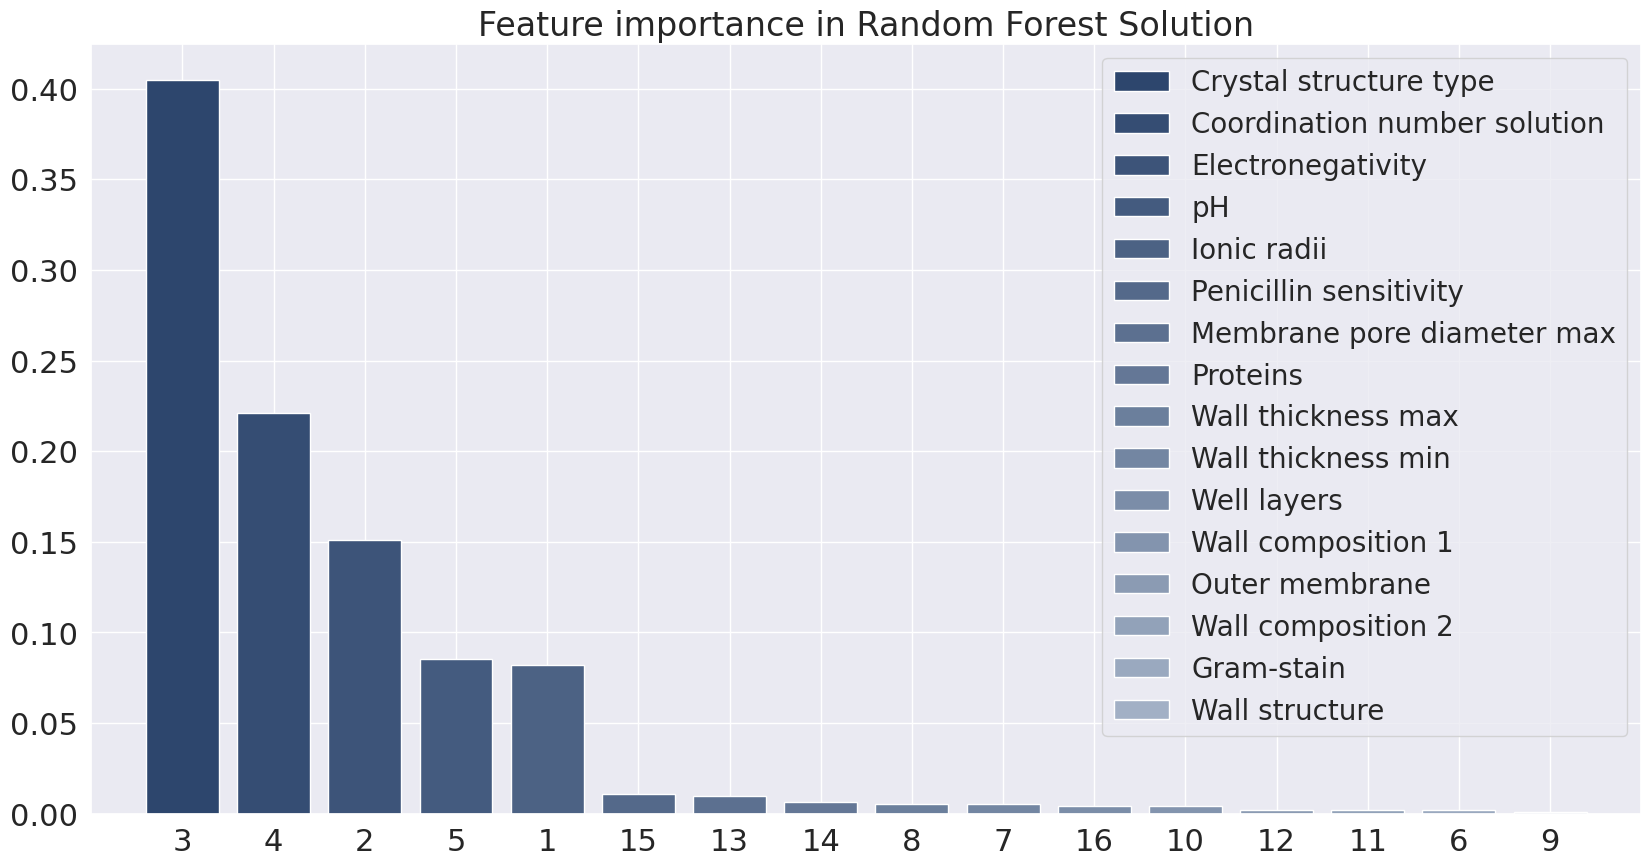

In [82]:
draw_importance(best_random_forest_solution.feature_importances_, "Random Forest Solution", X_solution.columns)

In [31]:
parameters = {
    'learning_rate': [0.5, 0.25, 0.1, 0.05],
    'n_estimators': [2, 4, 8, 16, 32, 64, 100, 200, 300, 400],
    'max_depth': range(1, 18, 1)}

model = GradientBoostingRegressor(random_state=42)
clf = GridSearchCV(
    model, 
    parameters, 
    cv=5, 
    scoring='neg_mean_absolute_error',
    refit=True,
    n_jobs=-1)
clf.fit(X_solution, y_solution)
best_gradient_boost_solution = clf.best_estimator_
print(clf.best_score_)
print(clf.best_params_)

-3.4125337931477318
{'learning_rate': 0.05, 'max_depth': 1, 'n_estimators': 2}


Feature ranking:
1. Electronegativity 0.523814 
2. Crystal structure type 0.476186 
3. Well layers 0.000000 
4. Penicillin sensitivity 0.000000 
5. Proteins 0.000000 
6. Membrane pore diameter max 0.000000 
7. Outer membrane 0.000000 
8. Wall composition 2 0.000000 
9. Wall composition 1 0.000000 
10. Wall structure 0.000000 
11. Wall thickness max 0.000000 
12. Wall thickness min 0.000000 
13. Gram-stain 0.000000 
14. рН 0.000000 
15. Coordination number solution 0.000000 
16. Ionic radii  0.000000 


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


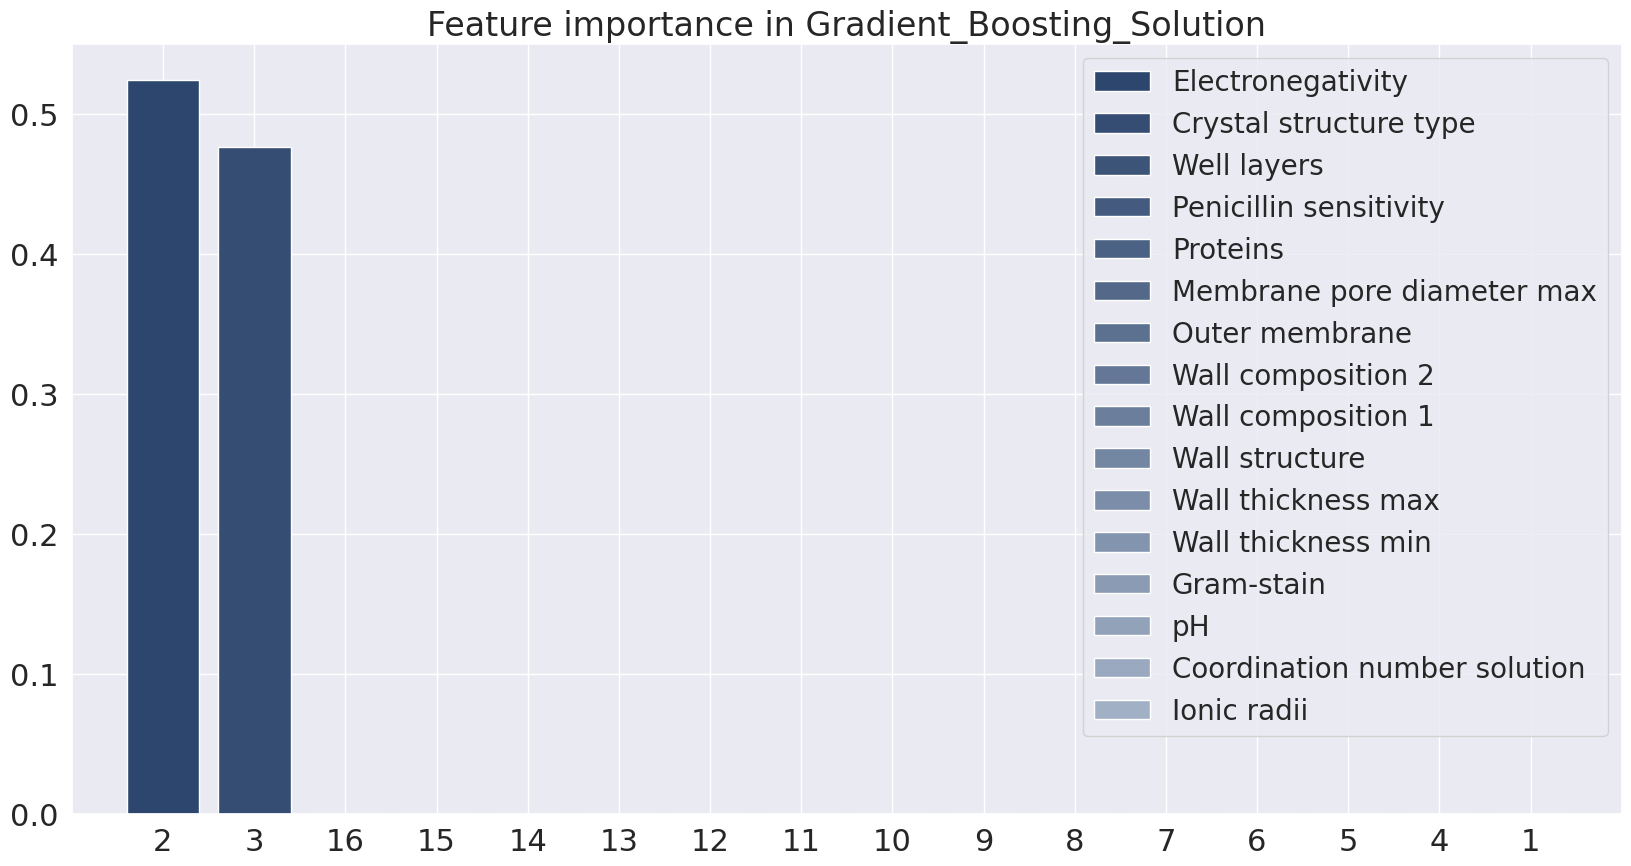

In [83]:
draw_importance(best_gradient_boost_solution.feature_importances_, "Gradient_Boosting_Solution", X_solution.columns)

In [33]:
parameters = {
    'min_child_weight': [1, 5, 7, 10, 11, 12, 15, 17],
    'gamma': [0.6, 1, 1.5, 2, 2.5, 3, 5],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.5, 0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5]
}

model = xgb.XGBRegressor(learning_rate=0.02, n_estimators=600, nthread=1, seed=0)
clf = GridSearchCV(
    model, 
    parameters, 
    cv=5, 
    scoring='neg_mean_absolute_error',
    refit=True,
    n_jobs=-1)
clf.fit(X_solution, y_solution)
best_xgboost_solution = clf.best_estimator_
print(clf.best_score_)
print(clf.best_params_)

-3.4032961697048614
{'colsample_bytree': 0.8, 'gamma': 5, 'max_depth': 3, 'min_child_weight': 17, 'subsample': 0.7}


Feature ranking:
1. Coordination number solution 0.236684 
2. Electronegativity 0.214943 
3. Ionic radii  0.204858 
4. Crystal structure type 0.191347 
5. рН 0.152168 
6. Well layers 0.000000 
7. Penicillin sensitivity 0.000000 
8. Proteins 0.000000 
9. Membrane pore diameter max 0.000000 
10. Outer membrane 0.000000 
11. Wall composition 2 0.000000 
12. Wall composition 1 0.000000 
13. Wall structure 0.000000 
14. Wall thickness max 0.000000 
15. Wall thickness min 0.000000 
16. Gram-stain 0.000000 


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


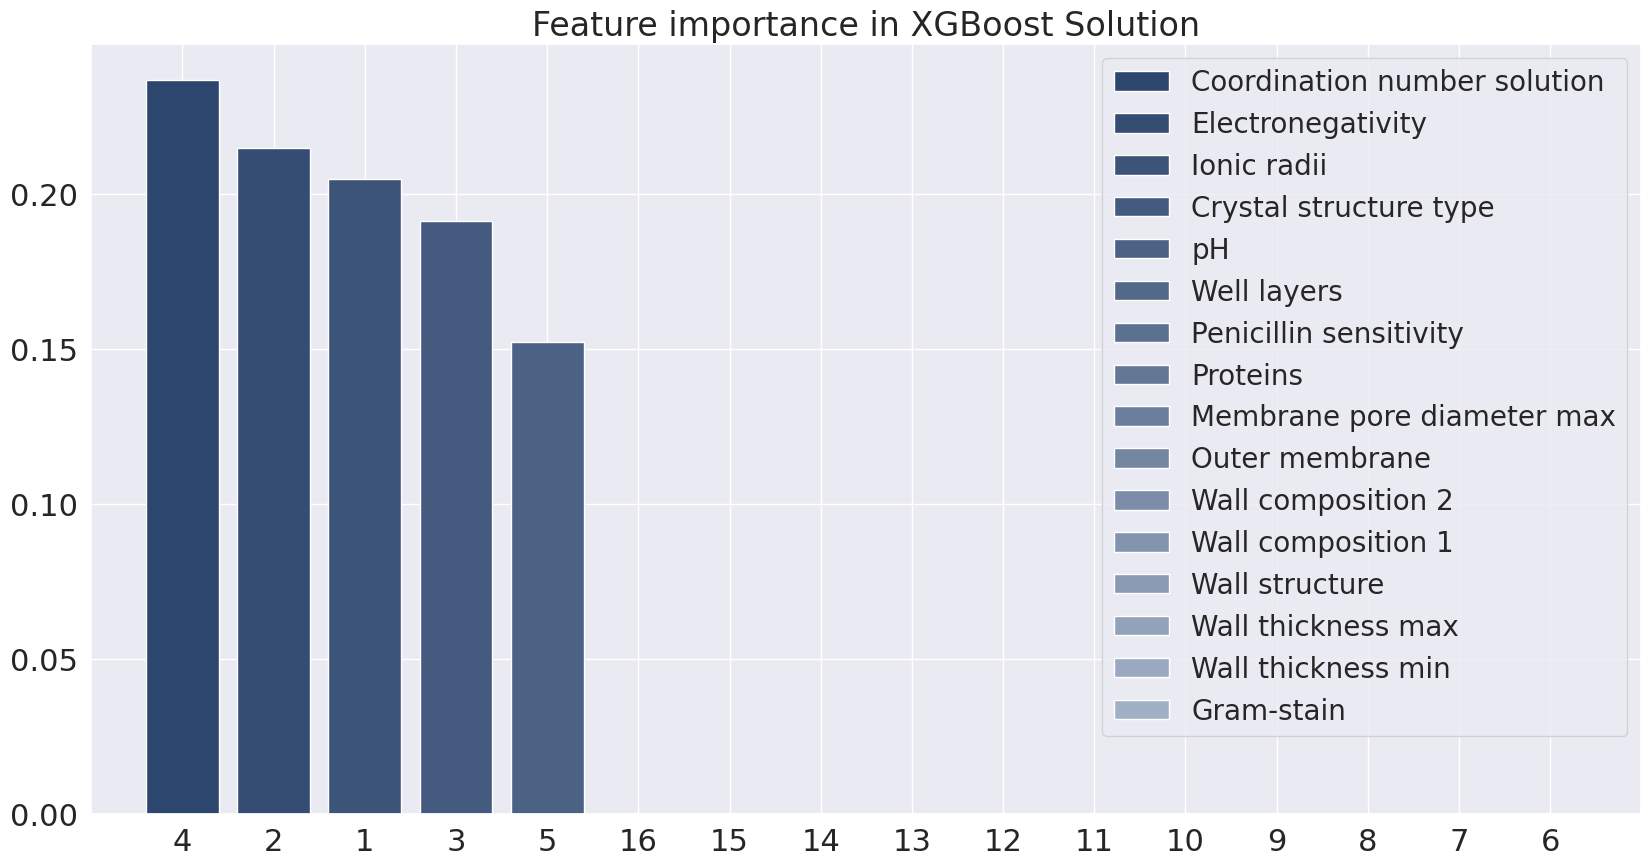

In [84]:
draw_importance(best_xgboost_solution.feature_importances_, "XGBoost Solution", X_solution.columns)

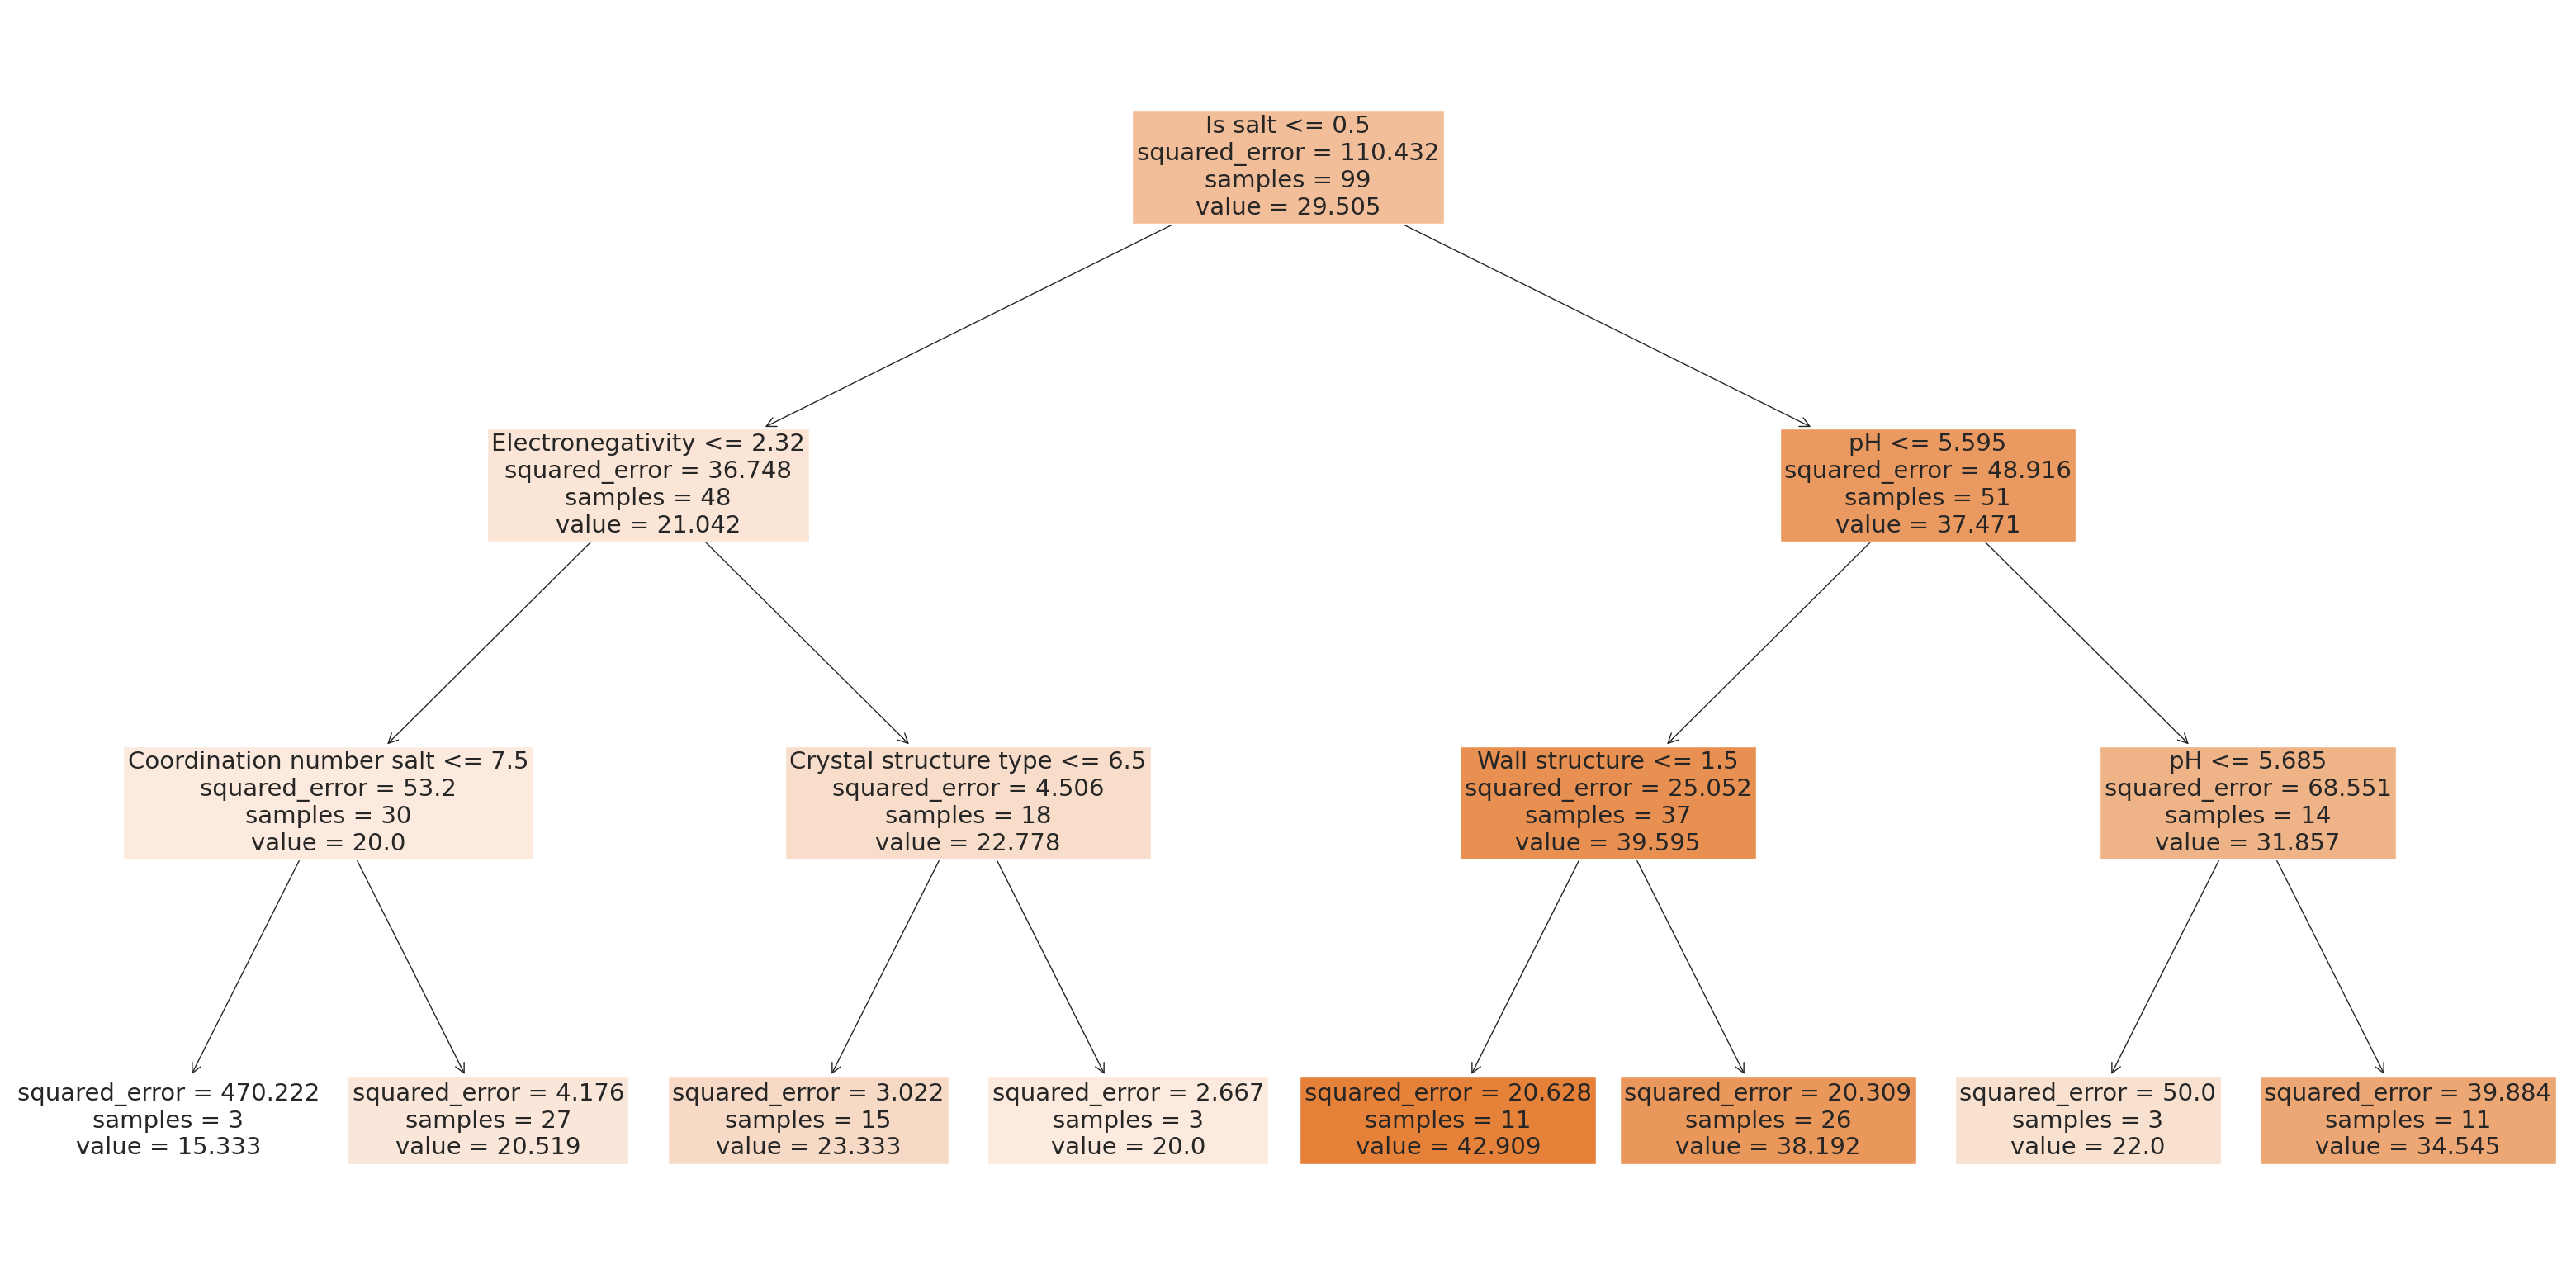

In [67]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

regr = DecisionTreeRegressor(max_depth=3, random_state=1234)
model = regr.fit(X, y)

fig = plt.figure(figsize=(40,20))
_ = tree.plot_tree(regr, feature_names=X.columns, filled=True, fontsize=21)
plt.savefig(f'mock/DecisionTree.svg', format='svg', dpi=600, bbox_inches='tight', transparent="True", pad_inches=0)

In [85]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':24}, pad=12);
plt.savefig(f'mock/Correlations.svg', format='svg', dpi=600, bbox_inches='tight', transparent="True", pad_inches=0)

ValueError: could not convert string to float: 'Solution'

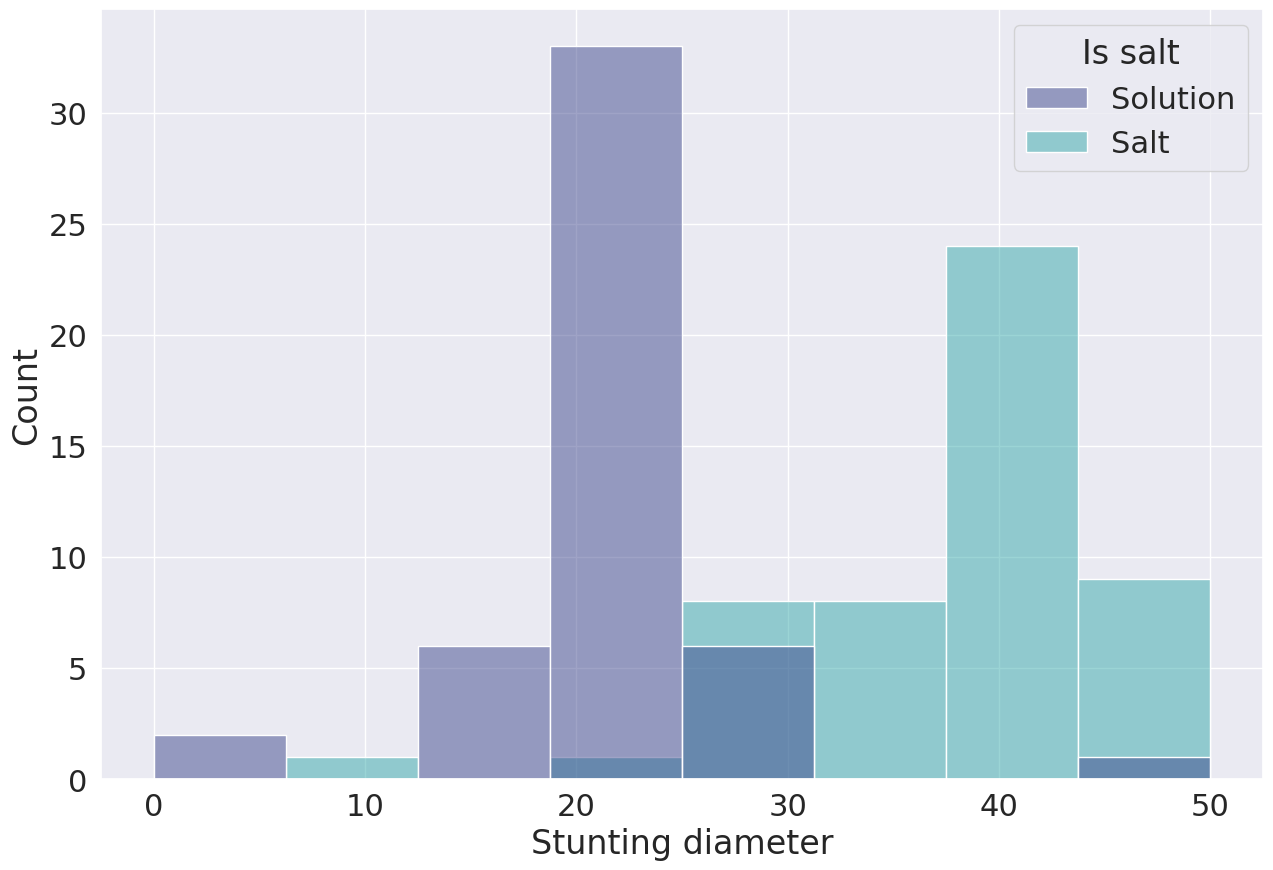

In [66]:
df['Is salt'].replace({0: 'Solution', 1: 'Salt'}, inplace=True)
plt.figure(figsize=(15, 10))
sns.set(font_scale=2)
sns.histplot(data=df, x='Stunting diameter', hue='Is salt', palette='mako')
plt.savefig(f'mock/Stunting diameter hist.svg', format='svg', dpi=600, bbox_inches='tight', transparent="True", pad_inches=0)